In [152]:
# Standard libraries
import sys
import math
import random
import time
import os

# Third-party imports
import numpy as np
import pandas as pd
import pickle as pkl

import matplotlib.pyplot as plt

import tensorflow as tf

import importlib
from yapf.yapflib.yapf_api import FormatCode

# Project imports
import ephesus
import utils

In [2]:
forma_names = {
    'curve_injec': 'Curve Injected',
    'curve_type': 'Curve Type',
    'cut_times': 'Cut Times',
    'cut_trans': 'Cut Transit', 
    'cut_numbe': 'Cut Number',
    'cut_start_index': 'Cut Start Index',
    'detre_time_scale': 'Detrended Time Scale [days]',
    'detre_type': 'Detrended Type',
    'eb': 'Eclipsing Binary',
    'file_name': 'File Name',
    'injec_times': 'Injection Times',
    'inter_type': 'Interpolation Spline',
    'initi_paddi': 'Initial Padding',
    'linea_limb_darke_coeff': 'Linear Limb Darkening Coefficient',
    'max_ampli': 'Max Amplitude',
    'moon_eccen': 'Moon Eccentricity',
    'moon_epoch': 'Moon Epoch [BJD]',
    'moon_incli': 'Moon Inclination [°]',
    'moon_mass': 'Moon Mass [M⨂]',
    'moon_numbe': 'Number of Moons',
    'moon_perio': 'Moon Period [days]',
    'moon_radiu': 'Moon Radius [R⨂]',
    'moon_sin_w': 'Planet Sin Argument of Periapsis [AU]',
    'plane_cut_injec': 'Cut Injected (Planet)',
    'plane_eccen': 'Planet Eccentricity',
    'plane_epoch': 'Planet Epoch [BJD]',
    'plane_incli': 'Planet Inclination [°]',
    'plane_mass': 'Planet Mass [M⨂]',
    'plane_moon_cut_injec': 'Cut Injected (Planet, Moon)',
    'plane_numbe': 'Number of Planets',
    'plane_perio': 'Planet Period [days]',
    'plane_radiu': 'Planet Radius [R⨂]',
    'plane_sin_w': 'Planet Sin Argument of Periapsis [AU]',
    'plane_type': 'Planet Type',
    'quadr_limb_darke_coeff': 'Quadratic Limb Darkening Coefficient',
    'ratio_moon_plane_radiu': 'Ratio of Moon to Planetary Radius',
    'ratio_moon_stell_radiu': 'Ratio of Moon to Stellar Radius', 
    'ratio_plane_stell_radiu': 'Ratio of Planetary to Stellar Radius',
    'signa': 'Signal',
    'stell_effec_tempe': 'Stellar Effective Temperature [C°]',
    'stell_magni': 'Stellar Magnitude',
    'stell_mass': 'Stellar Mass [M☉]',
    'stell_radiu': 'Stellar Radius [R☉]',
    'tic_id': 'TIC ID',
    'toi': 'TOI',
    'trape_trans': 'Trapezoidal Transits',
    'type_calcu': 'Type Calculation',
    'type_limb_darke': 'Type of Limb Darkening',
    'type_orbit_archi': 'Type of Orbital Architecture'
}

infor = {
    'curve_injec': False, 
    'curve_type': None,
    'cut_times': None,
    'cut_trans': None,
    'cut_numbe': None,
    'cut_start_index': None,
    'detre_time_scale': None,
    'detre_type': None,
    'eb': None,
    'file_name': None,
    'forma_names': forma_names,
    'injec_times': None,
    'inter_type': None,
    'initi_paddi': None,
    'linea_limb_darke_coeff': None,
    'max_ampli': None,
    'moon_eccen': None,
    'moon_epoch': None,
    'moon_incli': None,
    'moon_mass': None,
    'moon_numbe': None,
    'moon_perio': None,
    'moon_radiu': None,
    'moon_sin_w': None,
    'plane_cut_injec': None,
    'plane_eccen': None,
    'plane_epoch': None,
    'plane_incli': None,
    'plane_mass': None,
    'plane_moon_cut_injec': None,
    'plane_numbe': None,
    'plane_perio': None,
    'plane_radiu': None,
    'plane_sin_w': None,
    'plane_type': None,
    'quadr_limb_darke_coeff': None,
    'ratio_moon_plane_radiu': None,
    'ratio_moon_stell_radiu': None,
    'ratio_plane_stell_radiu': None,
    'signa': None,
    'stell_effec_tempe': None,
    'stell_magni': None,
    'stell_mass': None,
    'stell_radiu': None,
    'tic_id': None,
    'toi': None,
    'trape_trans': None,
    'type_calcu': None,
    'type_limb_darke': None,
    'type_orbit_archi': None
}

In [3]:
main_path = '/home/rfradkin/xom/'
raw_tess_path = '/scratch/data/tess/lcur/spoc/raws/'
tess_metad_path = '/data/scratch/data/tess/meta/'
xom_data_path = '/data/scratch/data/moon/'

### Import Light Curves

In [4]:
from_secto = 1
to_secto = 3 # Not inclusive
numbe_of_curve = 0

In [5]:
files = utils.retur_secto_files([from_secto, to_secto], f'{raw_tess_path}')
compl_set = ''
if numbe_of_curve: 
    sampl = utils.retur_rando_sampl(numbe_of_curve, len(files))
    files = [files[index] for index in sampl]
    compl_set = '-parti'

In [6]:
light_curve = utils.retur_fits_data(files, infor, f'{raw_tess_path}')

In [198]:
importlib.reload(utils);

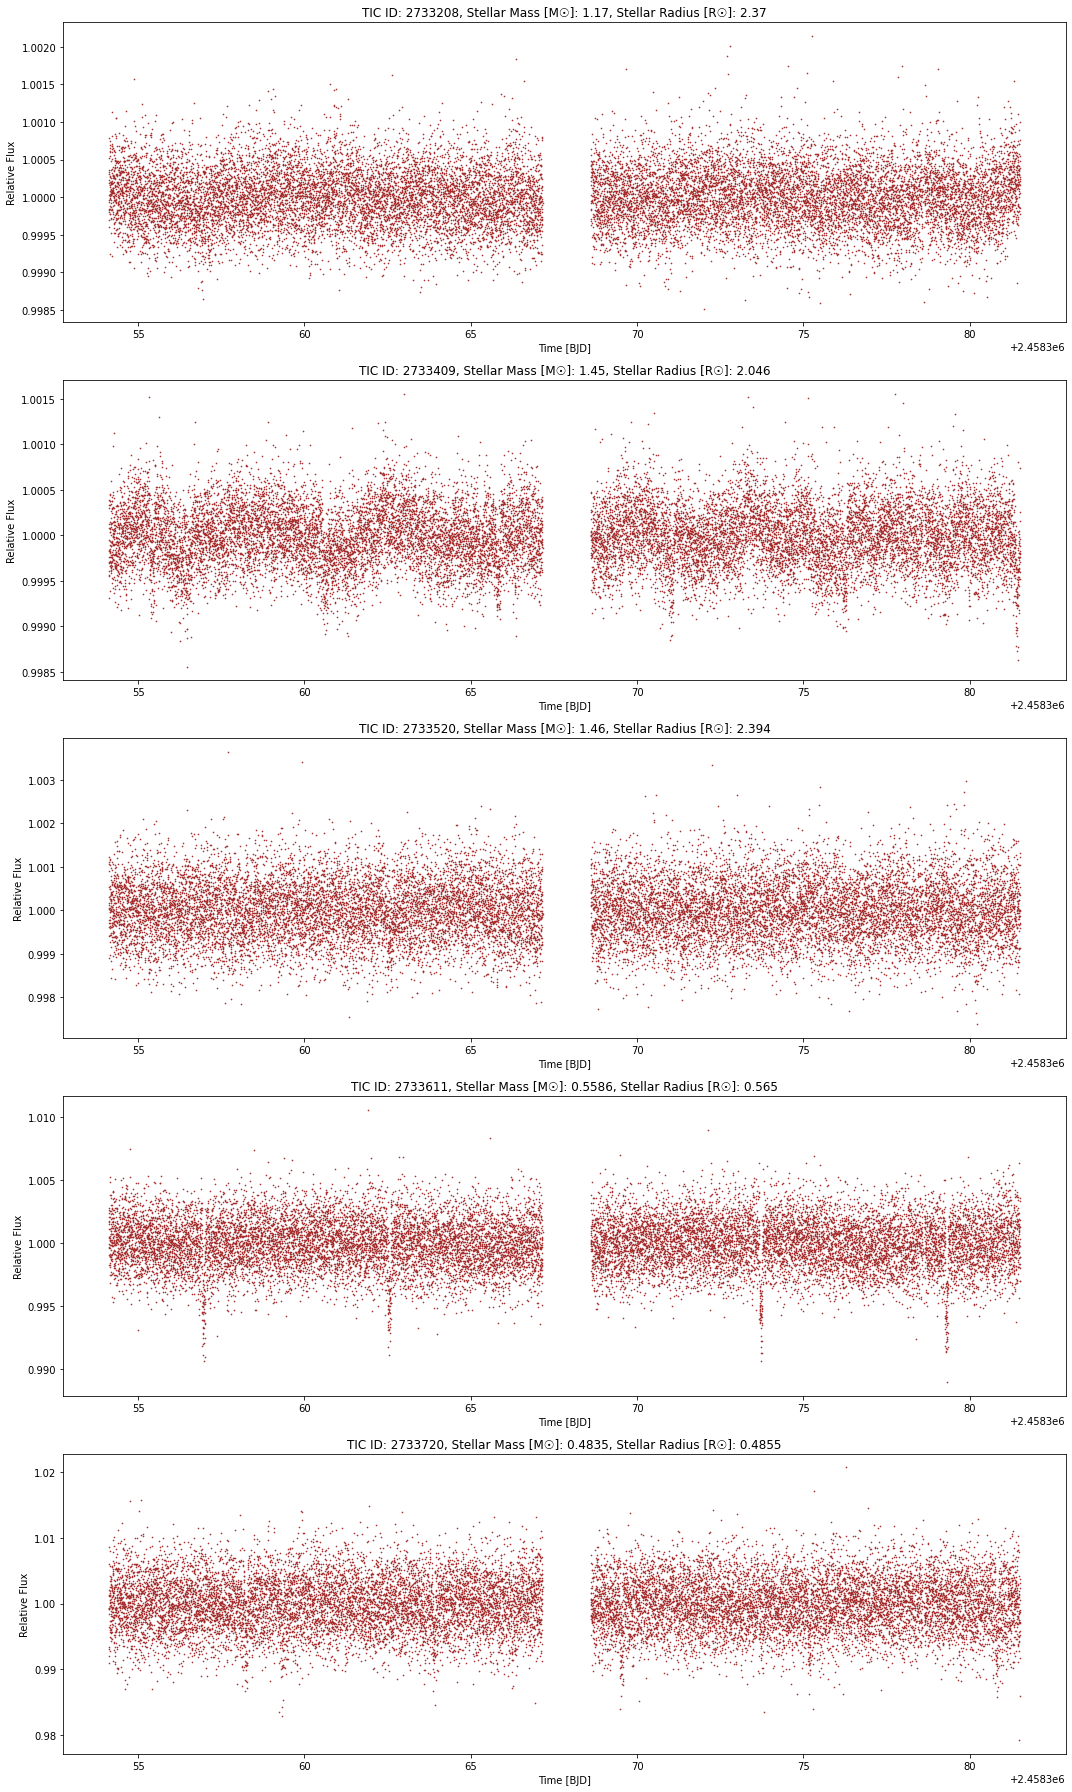

In [206]:
utils.show_curve(
    data=light_curve,
    start_stop_tic_id=[0, 5],
    featu=['stell_mass', 'stell_radiu'],
    highl_injec=False,
    highl_cuts=False,
    show_signa=False
)

### Mark TOIs, EBs, and Stellar Parameters

In [7]:
# Find TIC ID of all TOIs
toi_full = pd.read_csv(f'{tess_metad_path}toi.csv')
toi_id = toi_full['TIC ID'].to_numpy()
# Mark TOIs in light curve dataset
utils.mark_TOI(light_curve, toi_id)

In [8]:
TIC8 = pd.read_csv(f'{tess_metad_path}nomi_miss_2min_info.csv')

for i in range(len(light_curve)):
    TIC_ID = light_curve[i, -1, 1]['tic_id']
    # Find current TIC ID in TIC8
    star_infor = TIC8[TIC8.tici == TIC_ID]
    # Make sure TIC ID is in TIC8
    if len(star_infor):
        # Gather stellar radius, mass, temperature, and magnitude
        if str(star_infor.radistar.iloc[0]) != 'nan':
            light_curve[i, -1, 1]['stell_radiu'] = star_infor.radistar.iloc[0]
        if str(star_infor.massstar.iloc[0]) != 'nan':
            light_curve[i, -1, 1]['stell_mass'] = star_infor.massstar.iloc[0]
        if str(star_infor.tmptstar.iloc[0]) != 'nan':
            light_curve[i, -1, 1]['stell_effec_tempe'] = \
star_infor.tmptstar.iloc[0]
        if str(star_infor.tmag.iloc[0]) != 'nan':
            light_curve[i, -1, 1]['stell_magni'] = star_infor.tmag.iloc[0]

### Injecting

In [29]:
# Divide Curve
divid = len(light_curve) // 4
# Index of planet injections
plane_index = [0, divid]
# Index of planet and moon injections
plane_moon_index = [divid, 3 * divid]

injec_curve = np.copy(light_curve)
# Copy dictionaries
for i in range(len(injec_curve)):
    injec_curve[i, -1, 1] = injec_curve[i, -1, 1].copy()

In [ ]:
%%capture

# Inject planets
injec_curve[plane_index[0]:plane_index[1]] = utils.injec_curve(
    injec_curve[plane_index[0]:plane_index[1]], 1, 0, 'plan')

In [ ]:
%%capture

anima_path = None
# anima_path = f'{main_path}anima/'

# Inject planets and moons
# Save sections of planet moon injections if more than 300 injections
if plane_moon_index[1] - plane_moon_index[0] > 300:
    # Create a temporary text file that os can remove, since a
    # valid argument must be passed
    with open(f'{main_path}tempo.txt', 'w') as f:
        f.write('')
    filen = f'{main_path}tempo.txt'
    for i in range(plane_moon_index[0], plane_moon_index[1], 300):
        plane_moon_injec = utils.injec_curve(injec_curve[i:i + 300], 1, 1,
                                             'planmoon', anima_path=anima_path)
        # Add section to full injec_curve
        injec_curve[i:i + 300] = plane_moon_injec
        for ii in range(len(injec_curve[i:i + 300])):
            # If any curve is injected, add create a new copy
            # Created to stop resaving of partially injected data
            if not np.all(injec_curve[i + ii, :-1, 1] == light_curve[i + ii, :-1, 1]):
                # Remove previous version
                os.remove(filen)
                # Save new version
                filen = f'{xom_data_path}injec_curve/injec_curve-parti-{float(time.time())}.pkl'
                with open(filen, 'wb') as f:
                    pkl.dump(injec_curve, f)
                break
    if filen != f'{main_path}tempo.txt':
        os.rename(filen, f'{xom_data_path}injec_curve/injec_curve-full-{float(time.time())}.pkl')

else:
    injec_curve[plane_moon_index[0]:plane_moon_index[1]] = utils.injec_curve(
        injec_curve[plane_moon_index[0]:plane_moon_index[1]], 1, 1, 'planmoon', 
        anima_path=anima_path)
    
# Remove all injection sections older than two weeks
for injec_files in os.listdir(f'{xom_data_path}injec_curve'):
    if float(time.time()) - int(injec_files.split('-')[-1].split('.')[0]) > 1210000:
        os.remove(f'{xom_data_path}injec_curve/{injec_files}')

### Detrending

In [129]:
%%capture

detre_curve = np.copy(injec_curve)
# Copy dictionaries
for i in range(len(detre_curve)):
    detre_curve[i, -1, 1] = detre_curve[i, -1, 1].copy()

detre_scale = 0.4
detre_type = 'spln'

for i in range(len(injec_curve)):
    curre_detre = ephesus.bdtr_tser(
        time=injec_curve[i, utils.find_start(injec_curve[i]):-1,
                         0].astype(float),
        lcur=injec_curve[i, utils.find_start(injec_curve[i]):-1,
                         1].astype(float),
        typebdtr=detre_type,
        timescalbdtrspln=detre_scale,
    )[0]
    full_detre = curre_detre[0]
    # Take detrended chunks and turn them into one curve
    for j in range(1, len(curre_detre)):
        full_detre = np.concatenate((full_detre, curre_detre[j]))

    detre_curve[i, utils.find_start(injec_curve[i]):-1, 1] = full_detre
    # Set feature values
    detre_curve[i, -1, 1]['curve_type'] = 'Detrended Curve'
    detre_curve[i, -1, 1]['detre_time_scale'] = detre_scale
    detre_curve[i, -1, 1]['detre_type'] = detre_type

### Cutting, Interpolating, and Padding

In [148]:
stand_lengt = 1901
min_lengt = 600
max_time_gap = 10  # mins
caden = 2  # mins
spln_type = 'cubic'

list_cuts = []
for i in range(len(detre_curve)):
    pre_cut = np.copy(detre_curve[i])
    pre_cut[-1, 1] = pre_cut[-1, 1].copy()
    # Insert 'inter_spot' for later interpolation
    pre_cut = utils.inser_inter_spot(pre_cut, max_time_gap, caden)
    # Cut curve and assign cut times to the detrended curve
    pre_cut = utils.cut_curve(pre_cut, max_time_gap, min_lengt, stand_lengt)
    # Cut number
    cut_numbe = 0
    # Find used cut times
    cut_times = []
    for curre_cut in pre_cut:
        # Remove all cuts of only [0,0]
        if curre_cut[-2, 0]: 
            # Interpolate each cut
            cut = utils.inter_curve(curre_cut, spln_type)
            # Assign feature values
            cut[-1, 1]['plane_moon_cut_injec'] = False
            cut[-1, 1]['plane_cut_injec'] = False
            if cut[-1, 1]['type_orbit_archi'] == 'planmoon':
                cut[-1, 1]['plane_moon_cut_injec'] = utils.retur_curve_injec_statu(cut)
            elif cut[-1, 1]['type_orbit_archi'] == 'plan':
                cut[-1, 1]['plane_cut_injec'] = utils.retur_curve_injec_statu(cut)
            cut[-1, 1]['cut_trans'] = cut[-1, 1]['plane_moon_cut_injec'] or cut[-1, 1]['plane_cut_injec']
            cut[-1, 1]['cut_numbe'] = cut_numbe
            cut[-1, 1]['inter_type'] = spln_type
            # Assign cut to list containing the rest of the cuts
            list_cuts.append(cut.tolist())
            # Increase cut number
            cut_numbe += 1
            cut_times.append([cut[utils.find_start(cut), 0], cut[-2, 0]])
    # Assign cut times to the corresponding light, injected, and detrended curve
    light_curve[i, -1, 1]['cut_times'] = cut_times
    injec_curve[i, -1, 1]['cut_times'] = cut_times
    detre_curve[i, -1, 1]['cut_times'] = cut_times
    
padde_cuts = tf.keras.preprocessing.sequence.pad_sequences(list_cuts,
                                                           maxlen=stand_lengt,
                                                           dtype=object)

In [151]:
# Save data
detre_status = 'detre-' if padde_cuts[0, -1,
                                     1]['detre_time_scale'] else 'not_detre-'
print(f'Detrended Status: {detre_status[:-1]}')
padde_cuts_path = f'{xom_data_path}padde_cuts/padde_cuts-{detre_status}{from_secto}_{to_secto}{compl_set}-{float(time.time())}.pkl'
with open(padde_cuts_path, 'wb') as f:
    pkl.dump(padde_cuts, f)
print(f'Padded Cuts Path: {padde_cuts_path}')

Detrended Status: not_detre-
Padded Cuts Path: /data/scratch/data/moon/padde_cuts/padde_cuts-not_detre-1_3-1637795787.3582556.pkl


In [150]:
utils.send_task_comple_email('Injection and Cutting')

### Formatting